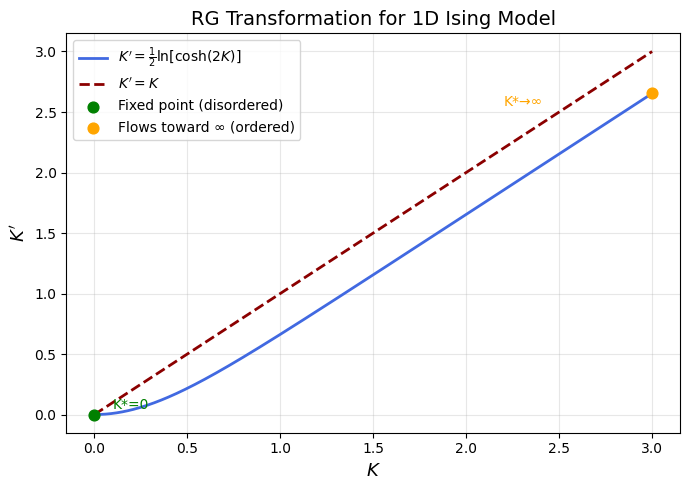

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define RG transformation for 1D Ising
def K_prime(K):
    return 0.5 * np.log(np.cosh(2*K))

# Range of K values (0 to 3 is enough to show behavior)
K = np.linspace(0, 3, 400)
Kp = K_prime(K)

# Plot
plt.figure(figsize=(7,5))
plt.plot(K, Kp, label=r"$K' = \frac{1}{2}\ln[\cosh(2K)]$", color='royalblue', linewidth=2)
plt.plot(K, K, label=r"$K' = K$", color='darkred', linestyle='--', linewidth=2)

# Highlight intersections at 0 and large K
plt.scatter([0], [0], color='green', s=60, zorder=5, label='Fixed point (disordered)')
plt.text(0.1, 0.05, 'K*=0', fontsize=10, color='green')

plt.scatter([3], [K_prime(3)], color='orange', s=60, zorder=5, label='Flows toward ∞ (ordered)')
plt.text(2.2, K_prime(3)-0.1, 'K*→∞', fontsize=10, color='orange')

plt.xlabel(r"$K$", fontsize=13)
plt.ylabel(r"$K'$", fontsize=13)
plt.title("RG Transformation for 1D Ising Model", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("RG_1D_Ising.png", dpi=600)  # Saves as PNG with good resolution
plt.show()

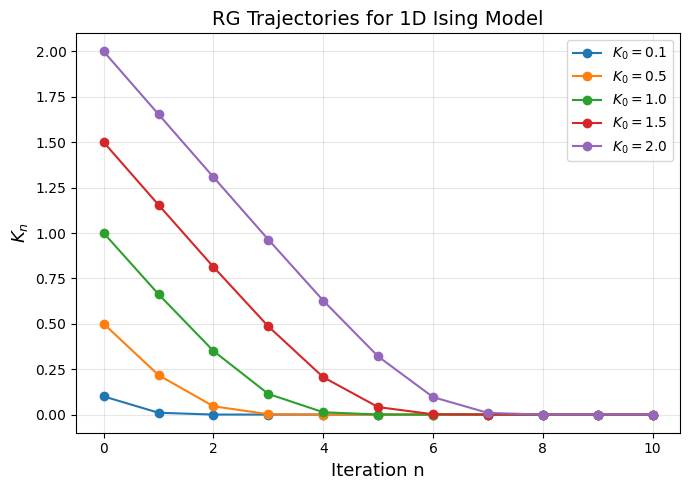

In [3]:
K0_values = [0.1, 0.5, 1.0, 1.5, 2.0]
iterations = 10

plt.figure(figsize=(7,5))
for K0 in K0_values:
    Ks = [K0]
    for _ in range(iterations):
        Ks.append(K_prime(Ks[-1]))
    plt.plot(range(iterations+1), Ks, marker='o', label=f"$K_0={K0}$")

plt.xlabel("Iteration n", fontsize=13)
plt.ylabel(r"$K_n$", fontsize=13)
plt.title("RG Trajectories for 1D Ising Model", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("RG_trajectories.png", dpi=600)
plt.show()


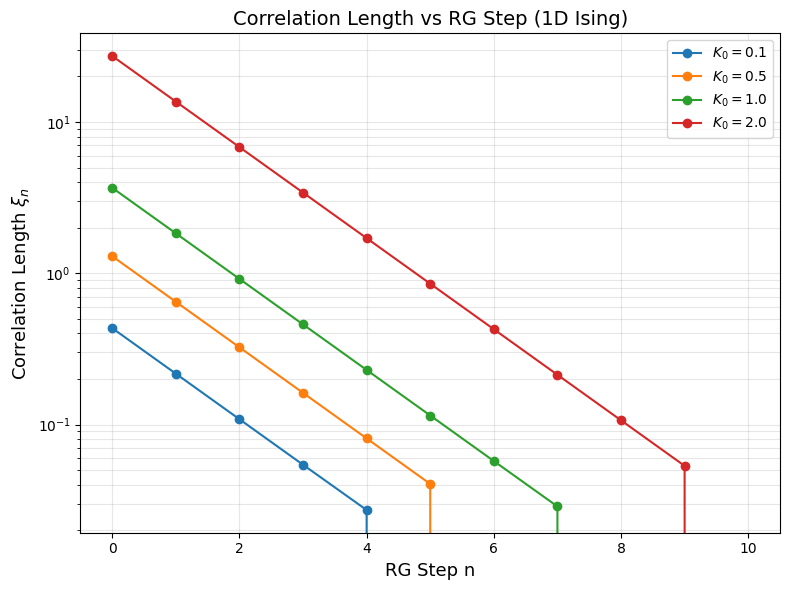

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# RG transformation
def K_prime(K):
    return 0.5 * np.log(np.cosh(2*K))

# Correlation length formula
def xi(K):
    return -1 / np.log(np.tanh(K))

# Initial couplings
K0_values = [0.1, 0.5, 1.0, 2.0]
iterations = 10

plt.figure(figsize=(8,6))

for K0 in K0_values:
    Ks = [K0]
    xis = [xi(K0)]
    for n in range(iterations):
        K_new = K_prime(Ks[-1])
        Ks.append(K_new)
        xis.append(xi(K_new))
    
    plt.plot(range(iterations+1), xis, marker='o', label=f"$K_0={K0}$")

plt.yscale('log')  # correlation length can change exponentially
plt.xlabel("RG Step n", fontsize=13)
plt.ylabel(r"Correlation Length $\xi_n$", fontsize=13)
plt.title("Correlation Length vs RG Step (1D Ising)", fontsize=14)
plt.grid(alpha=0.3, which="both")
plt.legend()
plt.tight_layout()
#plt.savefig("correlation_length_vs_RG_step.png", dpi=600)
plt.show()